***Fundamentals of Solar Cells and Photovoltaic Systems Engineering***

**Solutions Manual - Chapter 11**

***Problem 11.8***


***To estimate the wave loss in the effective irradiance seen by an unmoored FPV system located in Qinghai Lake (Qinghai, China) during the equinox considering that is a windy day.***

***Data:***

***- The FPV system is oriented to the south with an inclination of 30°.***

***- Consider that the swell produces a ±15º sine wave tilt variation with a period of 10 seconds.***

***Solve the problem using pvlib***

We will use the packages [pvlib](https://pvlib-python.readthedocs.io/en/stable/) and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.


In [1]:
import pvlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We start by defining the location, date and time. 
We will implement the calculation for every second on March 21, 2022. 

In [2]:
# Qinghai Lake, China
lat, lon = 37, 100.13
tz = 'Asia/Shanghai' #existing timezones can be checked using pytz.all_timezones[::20]

date = '2022-03-21'
# location
location = pvlib.location.Location(lat, lon, tz=tz)

# albedo
albedo = 0.10 #water reflectivity

# datetimes
times = pd.date_range(start=date, freq='1S', end=pd.Timestamp(date) + pd.DateOffset(days=1), tz=tz)

# generates clear-sky ghi, dni, dhi irradiances
clearsky = location.get_clearsky(times)

# calculates Sun's coordinates
solar_position = location.get_solarposition(times=times)

# surface angles alpha, beta
orientation = 180 # pvlib sets orientation origin at North -> South=180

tilt_fixed = 30
A = 15 # ±tilt amplitude [°]
T = 10 # wave period [s]
t = np.arange(0, len(times))
tilt_waving =  tilt_fixed + A*np.sin(2*np.pi*t/T)

In [3]:
# calculates POA
poa_fixed_irradiance = pvlib.irradiance.get_total_irradiance(
                        surface_tilt=tilt_fixed,
                        surface_azimuth=orientation,
                        dni=clearsky['dni'],
                        ghi=clearsky['ghi'],
                        dhi=clearsky['dhi'],
                        albedo=albedo,
                        solar_zenith=solar_position['apparent_zenith'],
                        solar_azimuth=solar_position['azimuth'],
                        model='isotropic')

poa_waving_irradiance = pvlib.irradiance.get_total_irradiance(
                        surface_tilt=tilt_waving,
                        surface_azimuth=orientation,
                        dni=clearsky['dni'],
                        ghi=clearsky['ghi'],
                        dhi=clearsky['dhi'],
                        albedo=albedo,
                        solar_zenith=solar_position['apparent_zenith'],
                        solar_azimuth=solar_position['azimuth'],
                        model='isotropic')

The daily irradiation for both fixed and waving cases is calculated

In [4]:
daily_fixed = poa_fixed_irradiance.poa_global.sum()/3600
daily_waving = poa_waving_irradiance.poa_global.sum()/3600

print(f'Fixed = {daily_fixed:.0f} Wh')
print(f'Waving = {daily_waving:.0f} Wh')

Fixed = 7990 Wh
Waving = 7863 Wh


In [5]:
waving_loss = (daily_fixed - daily_waving) / daily_fixed

print(f'Waving loss = {waving_loss:.1%}')

Waving loss = 1.6%


The waving irradiance can be plotted, noticing the period of the perturbing wave

Text(0, 0.5, 'Irradiance [$W/m^2$]')

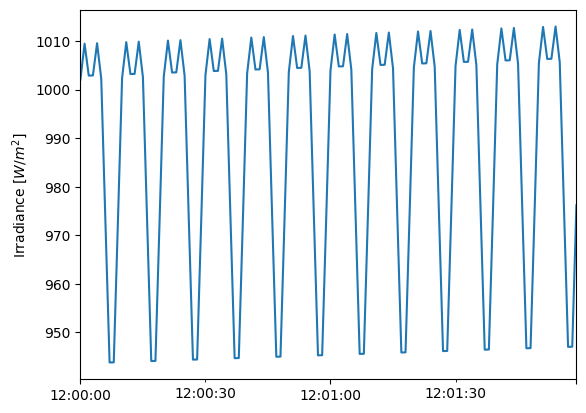

In [6]:
poa_waving_irradiance[date+' 12:00':date+' 12:01'].poa_global.plot()
plt.ylabel('Irradiance [$W/m^2$]')